# Notebook的顯示系統
## 1.display模組：
### (1)Latex顯示：用於數學公式顯示
### for迴圈內用display輸出，最後一行用Latex顯示數學公式

In [6]:
from IPython import display

for i in range(2, 4):
    display.display(display.Latex("$x^{i} + y^{i}$".format(i = i)))
display.Latex("$x^4 + y^4$")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### (2)Image顯示：用於影像顯示
### embed為True時，影像資料直接嵌入Notebook中

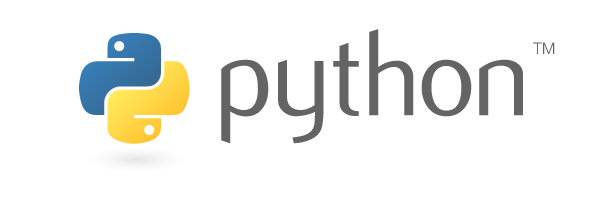

In [7]:
url = "https://www.python.org/static/community_logos/python-logo-master-v3-TM.png"
display.Image(url, embed=True)

### 利用matplotlib提供的imsave()函數將陣列轉換成png影像的字串，再透過Image將影像嵌入Notebook中

In [12]:
def transform_png(img, **kwargs):
    import io
    from matplotlib import image
    from IPython import display
    buf = io.BytesIO()
    image.imsave(buf, img, **kwargs)
    return buf.getvalue()

### 透過function sin(x^2 + 2y^2 + xy)產生陣列z，將陣列轉換成字串png，並檢視前10個bytes，將影像顯示出來

b'\x89PNG\r\n\x1a\n\x00\x00'


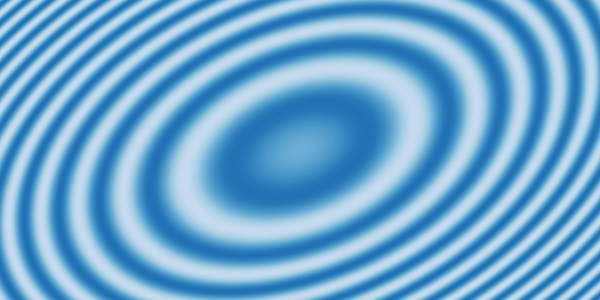

In [24]:
import numpy as np
y, x = np.mgrid[-3:3:300j, -6:6:600j] # 給指定的座標向量創建座標矩陣
z = np.sin(x**2 + 2*y**2 + x*y)
png = transform_png(z, cmap = "Blues", vmin = -2, vmax = 2)
print(repr(png[:10]))
display.Image(png)

## 2.自訂物件顯示格式


In [26]:
class Color:
    def __init__(self, r, g, b):
        self.rgb = r, g, b
    
    def html_color(self):
        return "#{:02x}{:02x}{:02x}".format(*self.rgb)
    
    def invert(self):
        r, g, b = self.rgb
        return Color(255 - r, 255 - g, 255 - b)
    
    def _repr_html_(self):
        color = self.html_color()
        inv_color = self.invert().html_color()
        template = '<span style = "background-color:{c};color:{ic};padding:5px;">{c}</span>'
        return template.format(c = color, ic = inv_color)
    
    def _repr_png_(self):
        img = np.empty((50, 50, 3), dtype = np.uint8)
        img[:, :, :] = self.rgb
        return transform_png(img)

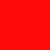

In [32]:
c = Color(255, 10, 10)
c
display.display_png(c)

In [33]:
shell = get_ipython()
png_formatter = shell.display_formatter.formatters[u'image/png']

In [34]:
png_formatter.for_type_by_name("numpy", "ndarray", transform_png)

<function __main__.transform_png(img, **kwargs)>

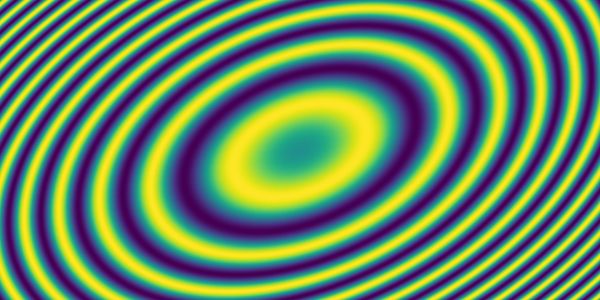

In [35]:
z